---
# <center> Setup <center>
---

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [166]:
# A customized pallete with a specific font
my_colors=sns.set_palette("icefire", n_colors=8)
sns.set_theme(style="darkgrid", palette=my_colors, font="verdana")

In [167]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

---
# <center> Read and Inspect Data <center>
---

In [168]:
df = pd.read_csv(r"\dataset\adult.csv")
df.shape

(48842, 15)

In [169]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [170]:
# Seperating between numcerical and categorical columns
numer_col = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
cate_col = list(set(df.columns) - set(numer_col))

In [171]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4009,43,Private,59460,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
12964,24,Private,354691,12th,8,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
9260,64,Self-emp-not-inc,108654,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1421,35,United-States,<=50K
15909,41,?,173651,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
32880,25,Private,114345,9th,5,Never-married,Craft-repair,Unmarried,White,Male,914,0,40,United-States,<=50K
31531,55,Private,377061,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
26479,43,Private,34007,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
36339,38,Private,107125,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K
27539,32,Private,116365,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,<=50K
26546,24,Private,283613,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,United-States,<=50K


#### **Features Explaination**

1. **`age`: Person’s age (numeric).**
2. **`workclass`: Type of employer (private, self-employed, government, etc.).**
3. **`fnlwgt`: Census weighting factor (a continuous number representing how many people the record stands for).**
4. **`education`: Highest level of education (e.g., Bachelors, Masters, HS-grad).**
5. **`education-num`: Numeric version of education level (years of education).**
6. **`marital-status`: Marital situation (married, divorced, never-married, etc.).**
7. **`occupation`: Type of job (e.g., tech-support, sales, farming, armed forces).**
8. **`relationship`: Role in the household (husband, wife, own-child, not-in-family, etc.).**
9. **`race`: Person’s race (White, Black, Asian, etc.).**
10. **`sex`: Gender (Male/Female).**
11. **`capital-gain`: Income from investments (numeric).**
12. **`capital-loss`: Losses from investments (numeric).**
13. **`hours-per-week`: Number of work hours per week.**
14. **`native-country`: Country of origin.**
15. **`class`: Target variable (income: >50K or <=50K).**

---
# <center> Null Values & Duplication<center>
---

##### **1. Na Handeling**

In [172]:
# The Null values are represented as "?". We need see in which column
for col in df.columns:
    print(f"The number of ? in {col}: {df[df[col] == "?"].shape[0]}")

The number of ? in age: 0
The number of ? in workclass: 2799
The number of ? in fnlwgt: 0
The number of ? in education: 0
The number of ? in educational-num: 0
The number of ? in marital-status: 0
The number of ? in occupation: 2809
The number of ? in relationship: 0
The number of ? in race: 0
The number of ? in gender: 0
The number of ? in capital-gain: 0
The number of ? in capital-loss: 0
The number of ? in hours-per-week: 0
The number of ? in native-country: 857
The number of ? in income: 0


In [173]:
# Replacing the Na values with None
for col in df.columns:
    df.replace({col: "?"}, None, inplace=True)

In [174]:
# Final Check
for col in df.columns:
    print(f"The number of ? in {col}: {df[df[col] == "?"].shape[0]}")

The number of ? in age: 0
The number of ? in workclass: 0
The number of ? in fnlwgt: 0
The number of ? in education: 0
The number of ? in educational-num: 0
The number of ? in marital-status: 0
The number of ? in occupation: 0
The number of ? in relationship: 0
The number of ? in race: 0
The number of ? in gender: 0
The number of ? in capital-gain: 0
The number of ? in capital-loss: 0
The number of ? in hours-per-week: 0
The number of ? in native-country: 0
The number of ? in income: 0


In [175]:
from utils import check_na
miss_df = check_na(df)
miss_df

,feature,missing#,missing%
1,workclass,2799,5.730724
6,occupation,2809,5.751198
13,native-country,857,1.754637


- **`Blue`** means not empty
- **`Non Blue`** means empty

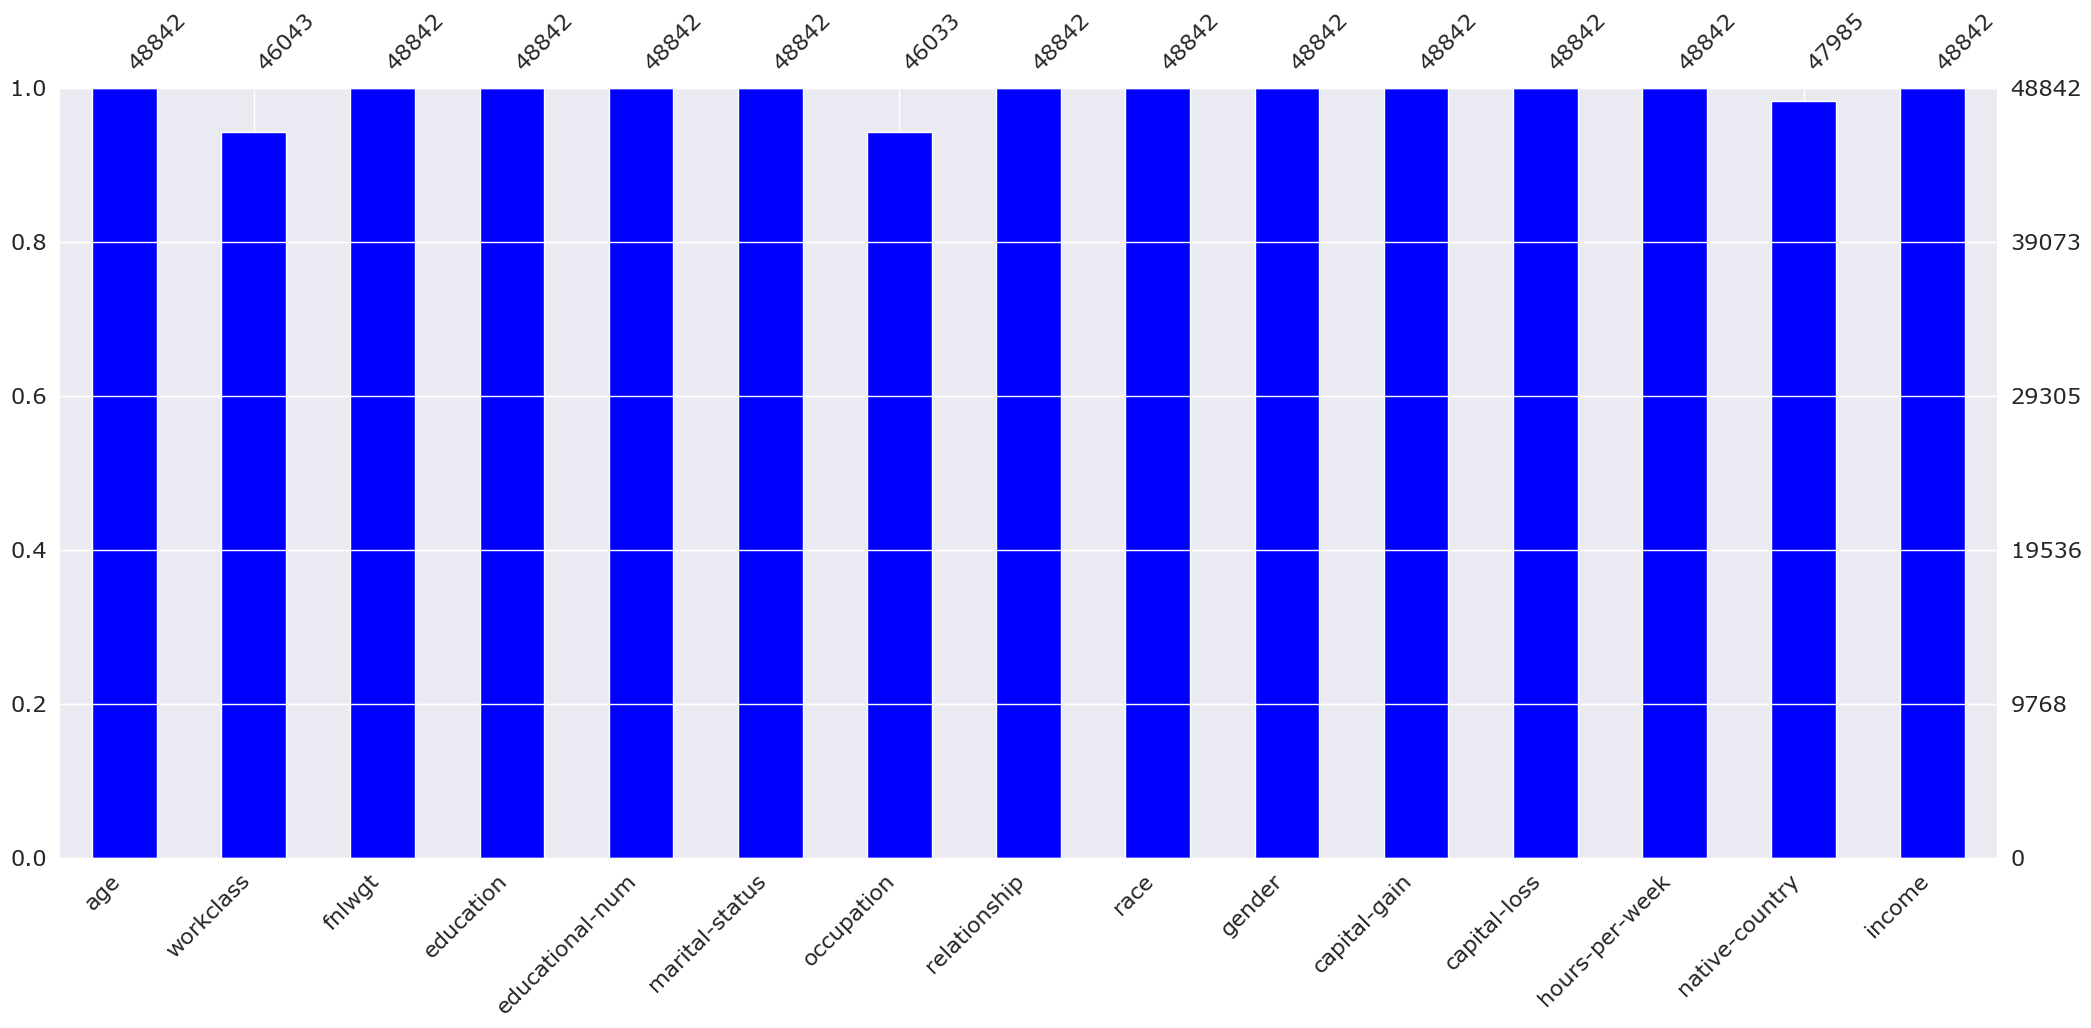

In [176]:
msno.bar(df, color="blue")
plt.show()

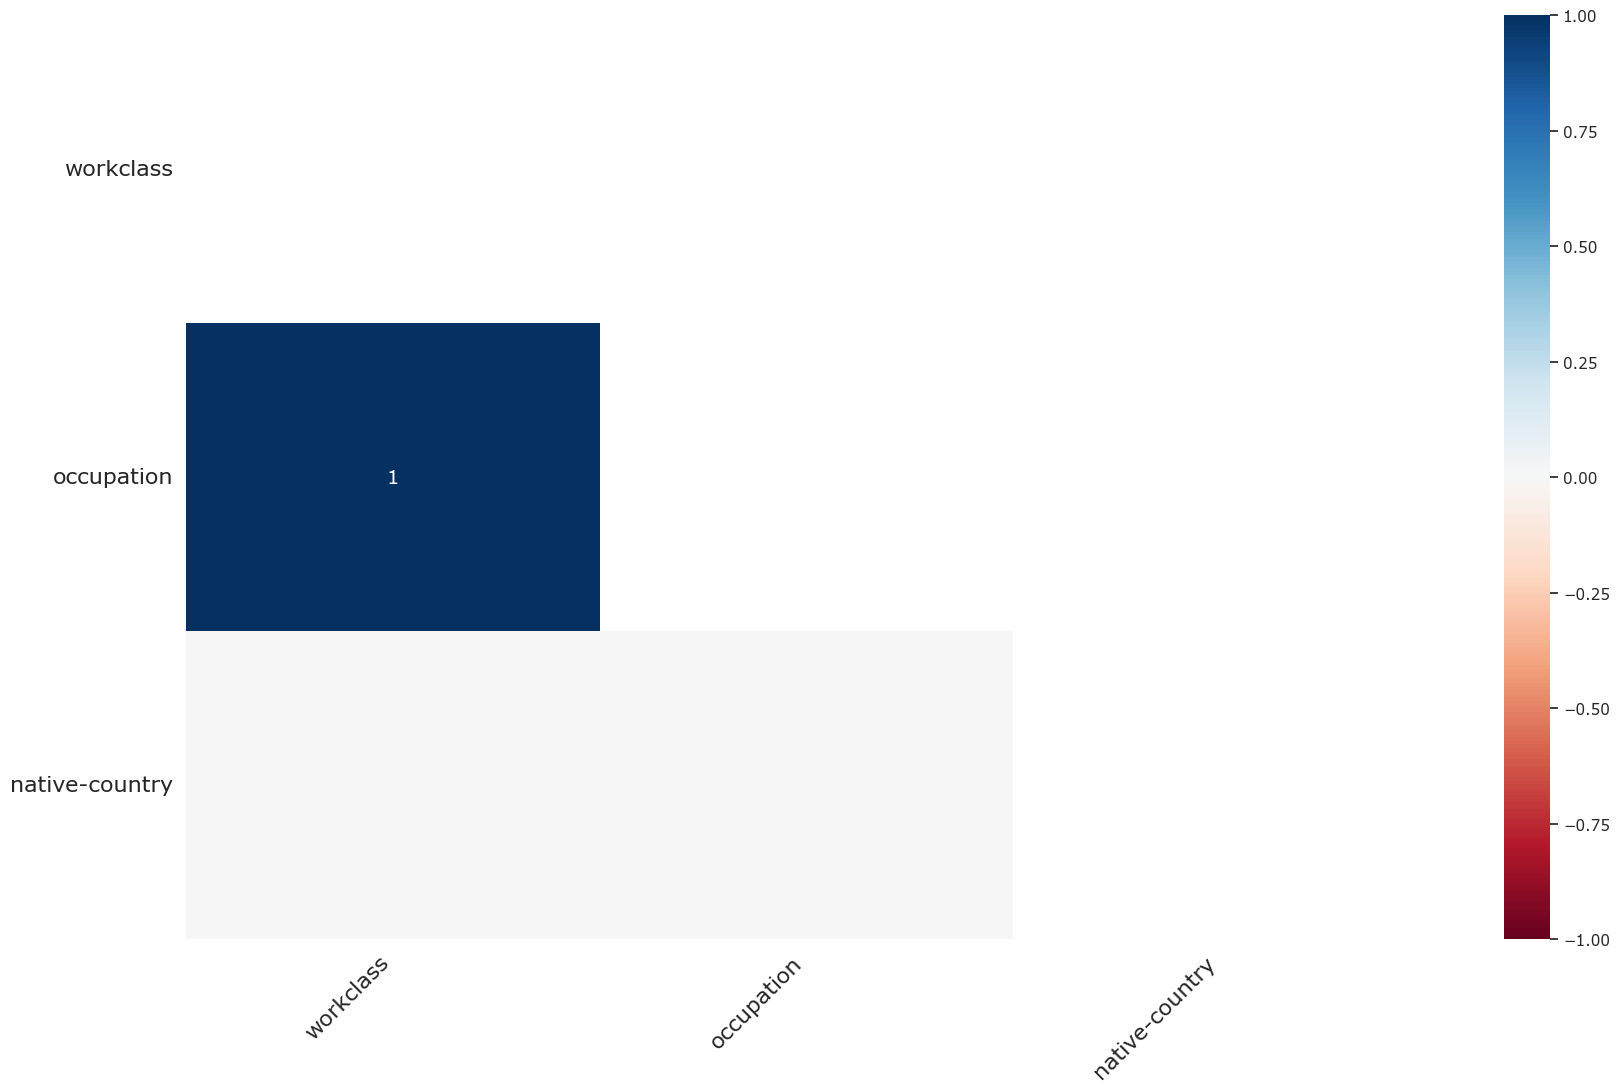

In [177]:
msno.heatmap(df)
plt.show()

- **`Strong`** relation between **workclass** missing values and **occupation**

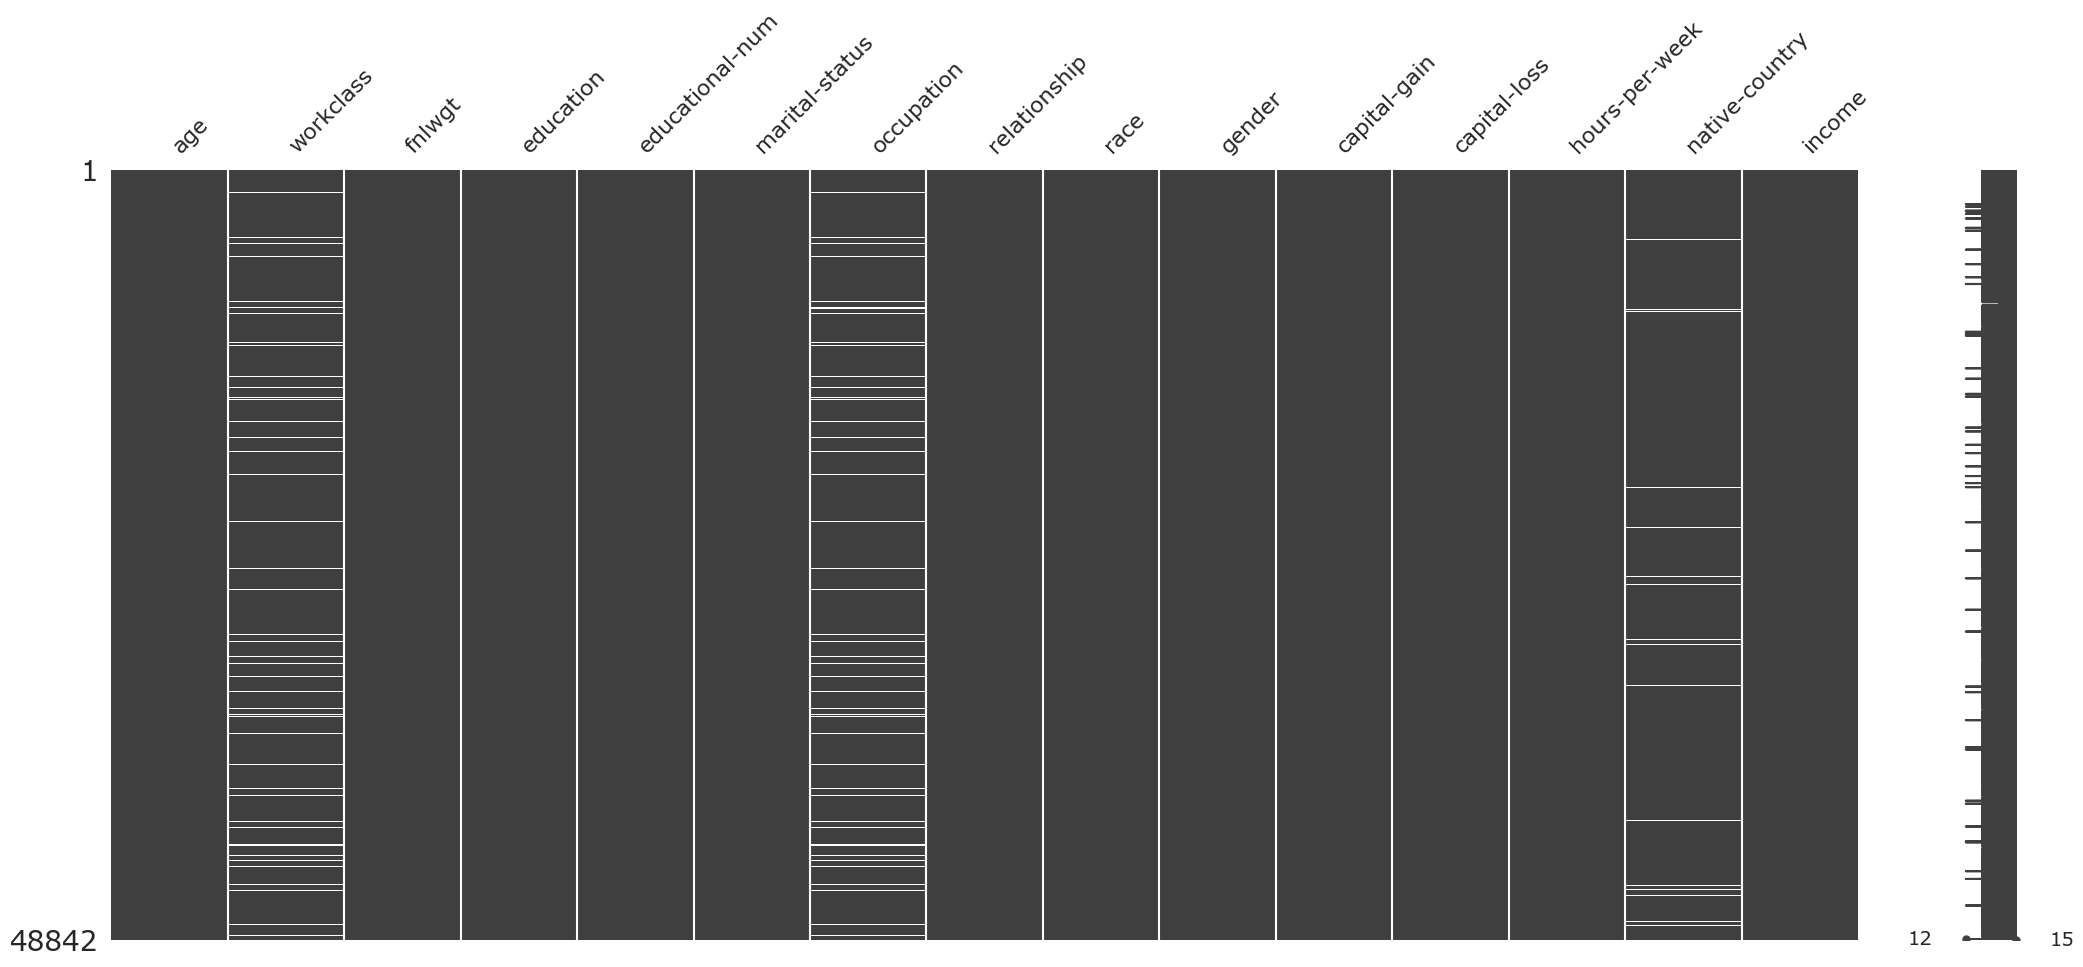

In [178]:
msno.matrix(df)
plt.show()

- **Can confirm it here**

In [179]:
occ = df[df["occupation"].isna()]
occ.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,2809.000000,10,2.809000e+03,2809,2809.000000,2809,0,2809,2809,2809,2809.000000,2809.000000,2809.000000,2763,2809
unique,NaN,1,NaN,16,NaN,7,0,6,5,2,NaN,NaN,NaN,38,2
top,NaN,Never-worked,NaN,Some-college,NaN,Never-married,NaN,Own-child,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,10,NaN,842,NaN,1242,NaN,875,2318,1536,NaN,NaN,NaN,2540,2544
mean,40.069064,NaN,1.873537e+05,NaN,9.244927,NaN,NaN,NaN,NaN,NaN,501.155571,67.394090,31.802065,NaN,NaN
std,20.229969,NaN,1.076936e+05,NaN,2.541079,NaN,NaN,NaN,NaN,NaN,4613.057951,362.491548,15.062973,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,21.000000,NaN,1.168200e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,NaN,NaN
50%,33.000000,NaN,1.751660e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,36.000000,NaN,NaN
75%,61.000000,NaN,2.337790e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


In [180]:
occ = df[~df["occupation"].isna()]
occ.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,46033.000000,46033,4.603300e+04,46033,46033.000000,46033,46033,46033,46033,46033,46033.000000,46033.000000,46033.000000,45222,46033
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,14972,NaN,21451,6172,19005,39444,31114,NaN,NaN,NaN,41292,34611
mean,38.556601,NaN,1.898051e+05,NaN,10.128929,NaN,NaN,NaN,NaN,NaN,1114.332653,88.729346,40.948407,NaN,NaN
std,13.204268,NaN,1.054747e+05,NaN,2.564064,NaN,NaN,NaN,NaN,NaN,7589.571484,405.316932,12.011069,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176060e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783530e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.378650e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- **There could be a connection with `capital-gain`** 

In [181]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

- **There is a connection between `workcalss` & `occupation` and `income` with a value `<=50K` `(MAR)`**

In [182]:
df[df['income'] == "<=50K" ].isna().sum()

age                   0
workclass          2534
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2544
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      637
income                0
dtype: int64

In [183]:
# Filling the NA values as a new category "unknown"
df.fillna({"workclass": "unknown", "occupation": "unknown"}, inplace= True)

In [184]:
check_na(df)

,feature,missing#,missing%
13,native-country,857,1.754637


In [185]:
df.dropna(inplace= True)

In [186]:
check_na(df)

,feature,missing#,missing%


##### **2. Duplcation Handeling** 

In [187]:
df.duplicated().sum()

np.int64(51)

In [188]:
df.drop_duplicates(inplace= True)

In [189]:
df.duplicated().sum()

np.int64(0)

---
# <center>EDA<center>
---

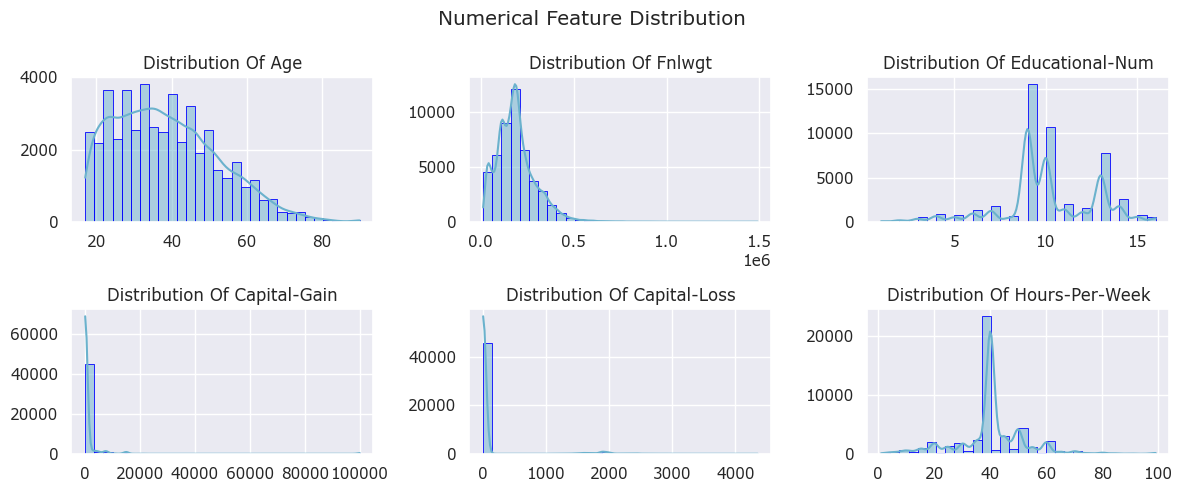

In [190]:
from utils import numerical_visualization
numerical_visualization(df, numer_col, kde= True)

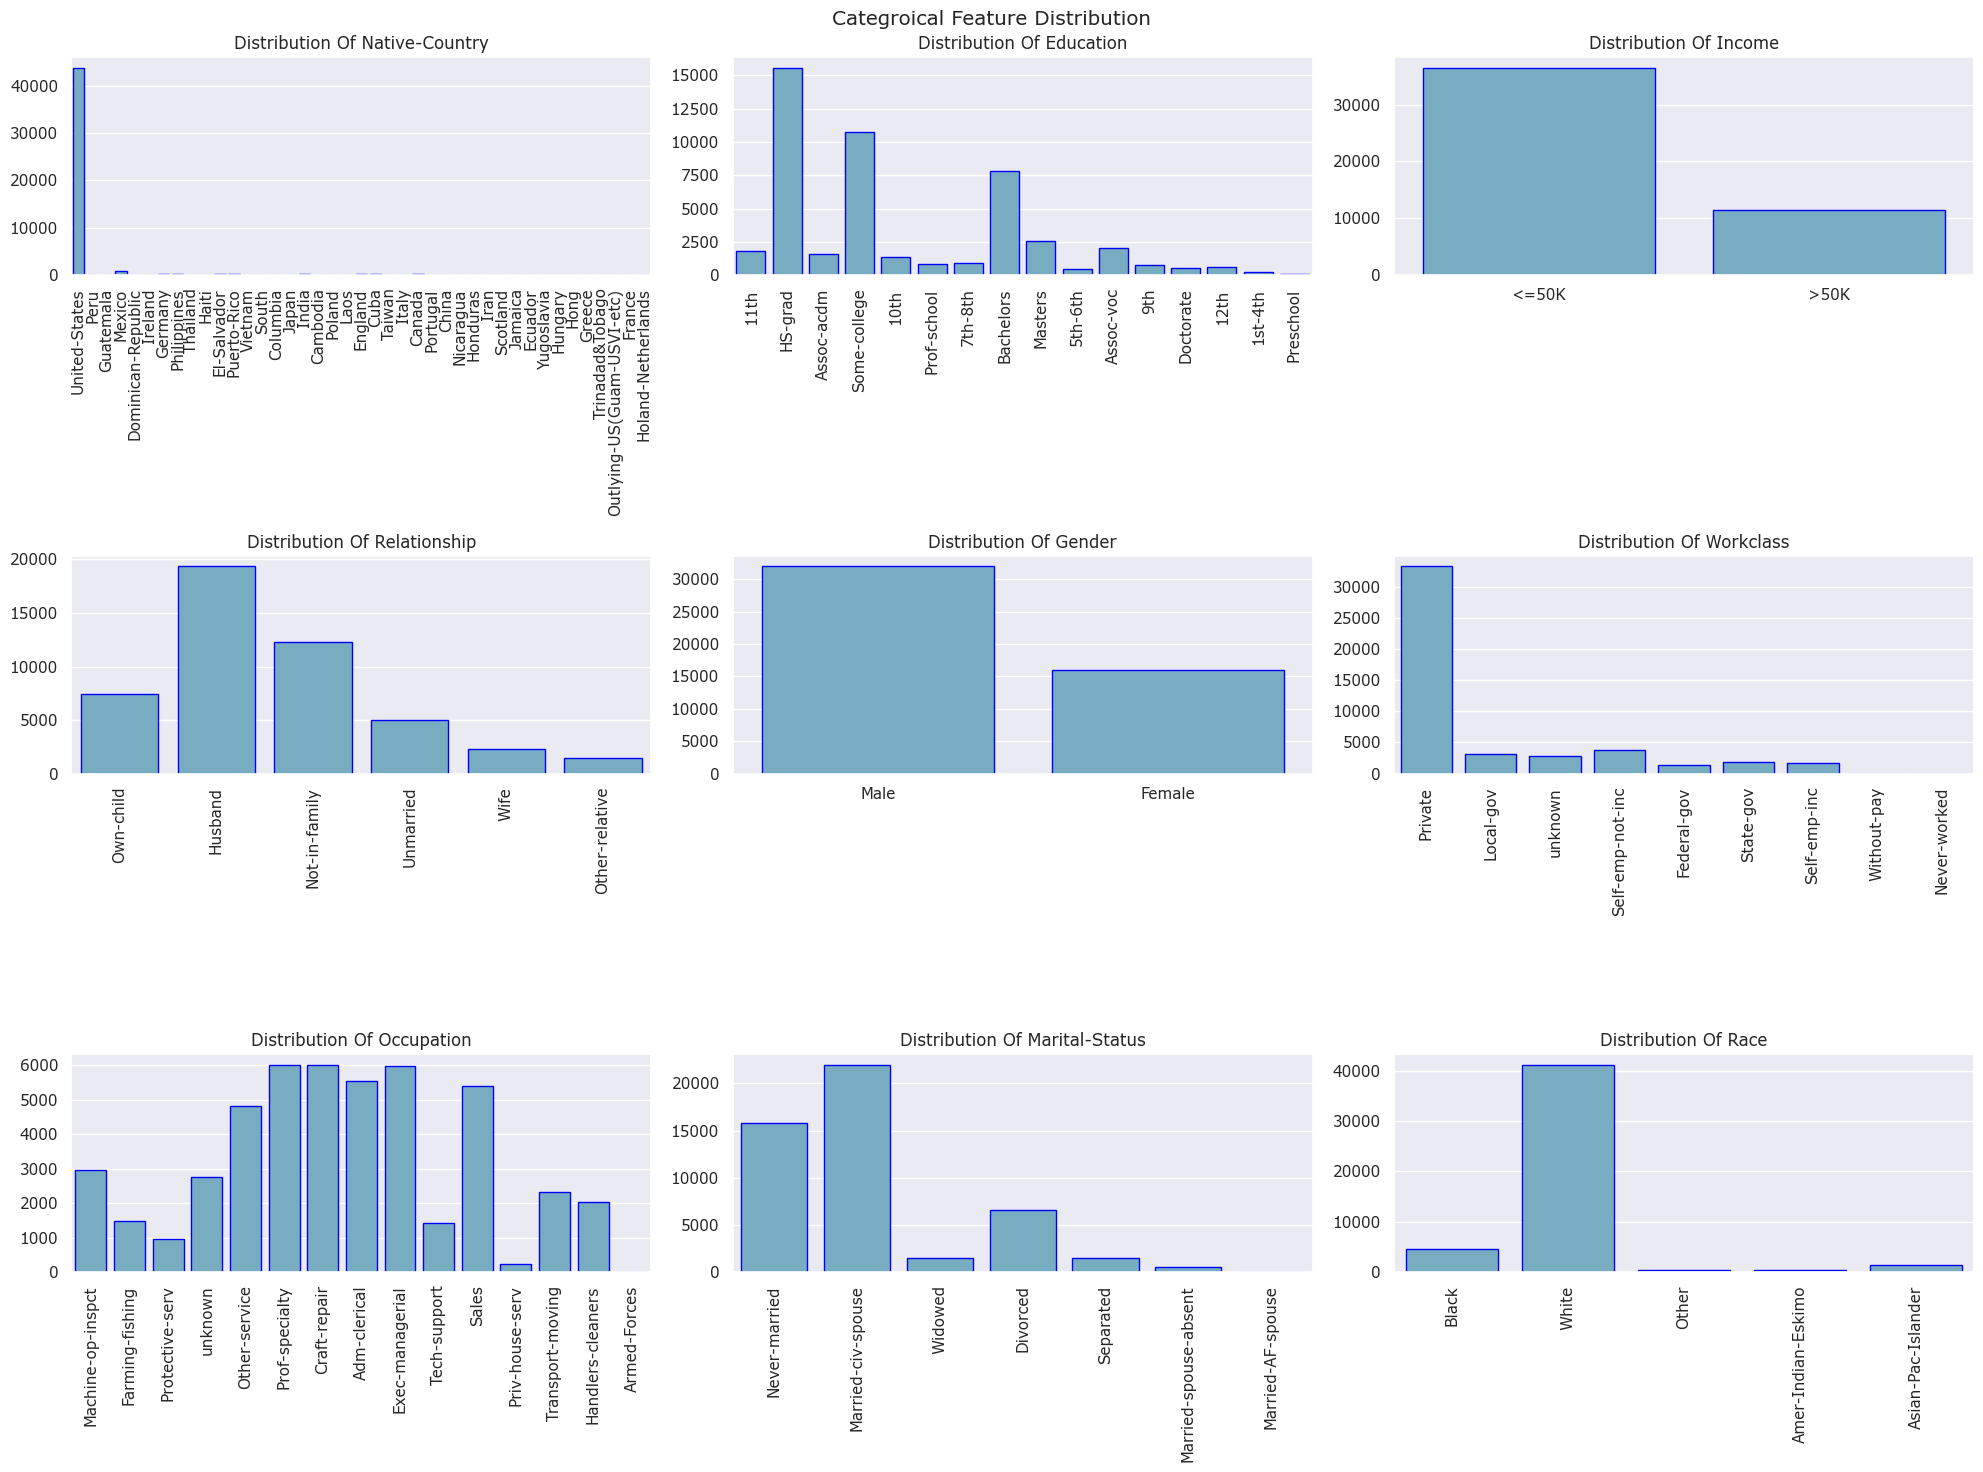

In [191]:
from utils import categorical_visualization
categorical_visualization(df, cate_col, figsize=(20, 15), rotation=90, nunique=4)

---
# <center> Data Preprocessing<center>
---

##### **1. Splitting the Data**

In [ ]:
# Dropping "native_country" feature since most of the data is concentraited in "United-States" and has so many categories 
# Dropping "fnlwgt" feature because it's a sampling weight method for surveys, useless for machine learning
df.drop(columns = ["native-country", "fnlwgt"], inplace = True)
# Select all features but the last 
x = df.drop(columns = "income")
# Select only the last feature (target)
y = df["income"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, train_size = 0.75)

In [193]:
# Checking which columns to encode using (one_hot or label) encoders
cate_col.remove("native-country")
for col in cate_col:
    print(f"Feature {col.title()}: {df[col].nunique()}")

Feature Education: 16
Feature Income: 2
Feature Relationship: 6
Feature Gender: 2
Feature Workclass: 9
Feature Occupation: 15
Feature Marital-Status: 7
Feature Race: 5


##### **2. One Hot Encoding** 

In [194]:
one_hot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

col_for_one_hot = ["education", "relationship", "workclass", "occupation", "marital-status", "race"]
# Apply one hot encoding
encoded_train = one_hot.fit_transform(x_train[col_for_one_hot]) 
encoded_test = one_hot.transform(x_test[col_for_one_hot])

In [195]:
# Turning them into a data frame 
encoded_x_train = pd.DataFrame(encoded_train, columns = one_hot.get_feature_names_out(col_for_one_hot), index = x_train.index)
encoded_x_test = pd.DataFrame(encoded_test, columns = one_hot.get_feature_names_out(col_for_one_hot), index = x_test.index)

In [196]:
# Connecting the encoded values with with the original data 
# As well as dropping the original columns that we encoded to make sure there are no duplication in the features
final_x_train = pd.concat([encoded_x_train, x_train.drop(columns = col_for_one_hot)], axis = 1)
final_x_test = pd.concat([encoded_x_test, x_test.drop(columns = col_for_one_hot)], axis = 1)

##### **3. Label Encoding**

In [197]:
ordinal_encoder = OrdinalEncoder()

final_x_train["gender"] = ordinal_encoder.fit_transform(final_x_train[["gender"]])
final_x_test["gender"] = ordinal_encoder.transform(final_x_test[["gender"]])

##### **4. Min Max Scaling**

In [198]:
min_max_scaler = MinMaxScaler()
numer_col.remove("fnlwgt")
final_x_train[numer_col] = min_max_scaler.fit_transform(final_x_train[numer_col])
final_x_test[numer_col] = min_max_scaler.transform(final_x_test[numer_col])

---
# <center> Model Training & Evaluation<center>
---

##### **1. Grid Searching Hyperparameters**

In [199]:
param_grid = {"n_neighbors": range(1, int(final_x_test.shape[0]**0.5))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1)
grid_search.fit(final_x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 109)})

In [200]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K = {best_k}")

Best value of K = 28


##### **2. Finding the Parameters based on the best K Value**

In [201]:
best_knn = KNeighborsClassifier(n_neighbors= best_k)
best_knn.fit(final_x_train, y_train)
y_pred = best_knn.predict(final_x_test)

##### **3. Evaluation**

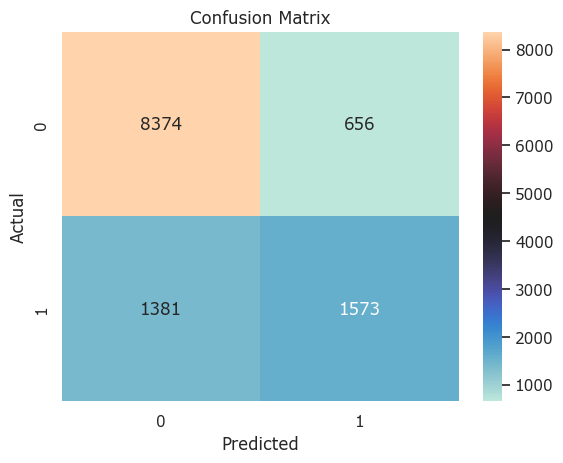

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="d", cmap="icefire")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [203]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      9030
        >50K       0.71      0.53      0.61      2954

    accuracy                           0.83     11984
   macro avg       0.78      0.73      0.75     11984
weighted avg       0.82      0.83      0.82     11984



##### **4. Predection** 

In [ ]:
def preprocess(value: dict, one_hot: OneHotEncoder, min_max_scaler: MinMaxScaler, ordinal_encoder: OrdinalEncoder) -> pd.DataFrame:
    """
        The function transforms the entered value into a data frame then passes it thruogh ordinal_encoding, one_hot_encoding
        and min_max_scaling and returns a preprocessed data frame

        Parameters:
            1. value: the values of the features we want to predict (dict)
            2. one_hot: an object of the OneHotEncoder (OneHotEncoder) 
            3. min_max_scaler: an object of the MinMaxScaler (MinMaxScaler)
            4. ordinal_encoder: an object of the OrdinalEncoder (OrdinalEncoder)

        Return Value:
            the preprocessed values as a data frame
    """
    # Transfrom the dict to a data frame
    value_df = pd.DataFrame([value])

    # 1. One hot encoding
    encoded = one_hot.transform(value_df[col_for_one_hot])
    # Transform into a data frame
    encoded_df = pd.DataFrame(encoded, columns = one_hot.get_feature_names_out(col_for_one_hot), index = value_df.index)
    # Combining the encoded columns with the original df while dropping them before encoding them
    final_value = pd.concat([encoded_df, value_df.drop(columns = col_for_one_hot)], axis = 1)

    # 2. Label encoding
    final_value["gender"] = ordinal_encoder.transform(final_value[["gender"]])

    # 3. Min max scaling
    final_value[numer_col] = min_max_scaler.transform(final_value[numer_col])

    return final_value

In [211]:
import pickle

# Save encoders
with open("one_hot.pkl", "wb") as f:
    pickle.dump(one_hot, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(min_max_scaler, f)

with open("ordinal.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)

In [ ]:
# A value for predection
value = {
    "age": 21, # [17: 90]
    "workclass": "Private", # Private, Self-emp-not-inc, Local-gov, unknown, State-gov, Self-emp-inc, Federal-gov, Without-pay, Never-worked
    "education": "Bachelors", # HS-grad, Some-college, Bachelors, Masters, Assoc-voc, 11th, Assoc-acdm, 10th, 7th-8th, Prof-school, 9th, 12th, Doctorate, 5th-6th, 1st-4th, Preschool
    "educational-num": 15, # [1, 16]
    "marital-status": "Never-married", # Married-civ-spouse, Never-married, Divorced, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
    "occupation": "Tech-support",   # Craft-repair, Prof-specialty, Exec-managerial, Adm-clerical, Sales, Other-service, Machine-op-inspct, unknown, Transport-moving, Handlers-cleaners, Farming-fishing, Tech-support, Protective-serv, Priv-house-serv, Armed-Forces
    "relationship": "Unmarried", # Husband, Not-in-family, Own-child, Unmarried, Wife, Other-relative
    "race": "White", # White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other
    "gender": "Male", # Male, Female
    "capital-gain": 0, # [0: 99999]
    "capital-loss": 0, # [0: 4500]
    "hours-per-week": 25, # [1: 99]
}

In [ ]:
# Preprocessing the entered data
value_to_pred = preprocess(value, one_hot, min_max_scaler, ordinal_encoder)

##### **5. Saving Model**

In [ ]:
file_name = "knn_model.sav"
pickle.dump(best_knn, open(file_name, 'wb'))

# load the model
load_model = pickle.load(open(file_name, 'rb'))

In [ ]:
# Final predection result
load_model.predict(value_to_pred)[0]

'<=50K'